In [ ]:
!pip install ultralytics==8.3.49

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Import required libraries
import sys
import numpy as np
import torch
import os
from ultralytics import settings  # Import settings from ultralytics

# Update Ultralytics settings
settings.update({'runs_dir': '/content/drive/MyDrive/nighttime_vehicle_results/runs'})
print("Ultralytics settings updated:", settings)

# Verify Python, NumPy, and PyTorch versions
print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("PyTorch version:", torch.__version__)

# Ensure compatibility
assert sys.version_info >= (3, 10), "Python version must be >= 3.10"
assert torch.__version__ >= '1.8.0', "PyTorch version must be >= 1.8.0 for YOLOv8"

# Verify GPU availability
print("CUDA Available:", torch.cuda.is_available())
print("GPU Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
!nvidia-smi  # Display GPU info

# Set working directory
os.makedirs("/content/nighttime_vehicle_detection", exist_ok=True)
os.chdir("/content/nighttime_vehicle_detection")
print("Working Directory:", os.getcwd())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics settings updated: JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "/content/drive/MyDrive/nighttime_vehicle_results/runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}
Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
NumPy version: 2.0.2
PyTorch version: 2.6.0+cu1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

drive_path = '/content/drive/MyDrive'
sub_dir = '/content/drive/MyDrive/nighttime_vehicle_results'

print(f"Files in {drive_path}:")
if os.path.exists(drive_path):
    print(os.listdir(drive_path))
else:
    print("Directory not found")

print(f"\nFiles in {sub_dir} (if it exists):")
if os.path.exists(sub_dir):
    print(os.listdir(sub_dir))
else:
    print("Directory not found")

Files in /content/drive/MyDrive:
['Classroom', '11th iit weekday evening chemical bonding.pdf', 'CHE_HYDROGEN & ITS COMPOUNDS Mvm.pdf', 'Biomolecules (1).pdf', 'Biomolecules.pdf', 'B.Tech Electrical and Computer Engineering-Amrita School of Engineering, Coimbatore_Admission-Details_20230714124646.pdf', 'Colab Notebooks', 'nighttime_vehicle_dataset', 'nighttime_vehicle_results']

Files in /content/drive/MyDrive/nighttime_vehicle_results (if it exists):
['yolov8s_nighttime', 'yolov8s_nighttime_weights.pkl', 'yolov8s_nighttime_weights.joblib']


In [ ]:
import os
def find_file(name, path):
    for root, _, files in os.walk(path):
        if name in files:
            print(f"Found: {os.path.join(root, name)}")
find_file('ground_truth.txt', '/content/drive/MyDrive')

In [ ]:
import os
def find_images_folder(path):
    for root, dirs, files in os.walk(path):
        if any(file.startswith('img_') and file.endswith(('.jpg', '.png')) for file in files):
            print(f"Images found in: {root}")
            print(f"Sample files: {files[:5]}")
find_images_folder('/content/drive/MyDrive')

In [ ]:
import os
results_dir = '/content/drive/MyDrive/nighttime_vehicle_results'
for subdir in os.listdir(results_dir):
    subdir_path = os.path.join(results_dir, subdir)
    if os.path.isdir(subdir_path):
        print(f"Files in {subdir_path}:")
        print(os.listdir(subdir_path))

Files in /content/drive/MyDrive/nighttime_vehicle_results/yolov8s_nighttime:
['weights', 'args.yaml', 'labels_correlogram.jpg', 'labels.jpg', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'train_batch4780.jpg', 'train_batch4781.jpg', 'train_batch4782.jpg', 'results.csv', 'results.png', 'val_batch1_labels.jpg', 'val_batch0_pred.jpg', 'val_batch0_labels.jpg', 'val_batch2_pred.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'P_curve.png', 'R_curve.png', 'PR_curve.png', 'confusion_matrix_normalized.png', 'confusion_matrix.png', 'F1_curve.png']


In [ ]:
import os

def convert_to_yolo_format(gt_file, image_dir, output_label_dir):
    # Verify that gt_file exists
    if not os.path.exists(gt_file):
        raise FileNotFoundError(f"Ground truth file not found at: {gt_file}")
    # Verify that image_dir exists
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Image directory not found at: {image_dir}")

    os.makedirs(output_label_dir, exist_ok=True)
    img_width, img_height = 1280, 1024

    with open(gt_file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            print(f"Skipping invalid line in gt_file: {line.strip()}")
            continue
        try:
            img_num = int(parts[0])
            num_vehicles = int(parts[1])
            bboxes = parts[2:]  # [x1, y1, width, height] for each vehicle
        except ValueError as e:
            print(f"Error parsing line: {line.strip()}. Skipping. ({e})")
            continue

        # Verify bounding box data
        if len(bboxes) != num_vehicles * 4:
            print(f"Warning: Incorrect number of bounding box values for img_{img_num}. Expected {num_vehicles * 4}, got {len(bboxes)}")
            continue

        label_file = os.path.join(output_label_dir, f"img_{img_num}.txt")
        with open(label_file, 'w') as lf:
            for i in range(num_vehicles):
                try:
                    x1 = float(bboxes[i * 4])
                    y1 = float(bboxes[i * 4 + 1])
                    width = float(bboxes[i * 4 + 2])
                    height = float(bboxes[i * 4 + 3])

                    x_center = (x1 + width / 2) / img_width
                    y_center = (y1 + height / 2) / img_height
                    norm_width = width / img_width
                    norm_height = height / img_height

                    lf.write(f"0 {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}\n")
                except ValueError as e:
                    print(f"Error parsing bbox for img_{img_num}, vehicle {i+1}: {e}")
                    continue

    print(f"YOLO labels created in {output_label_dir}")

# Define paths
local_dataset_path = "/content/nighttime_vehicle_detection"
label_dir = os.path.join(local_dataset_path, "labels")

# Update these paths after verifying
gt_file = "/content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt"  # Likely path, update after checks
image_dir = "/content/drive/MyDrive/nighttime_vehicle_dataset/images"          # Likely path, update after checks

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify paths
print("Checking gt_file:", os.path.exists(gt_file))
print("Checking image_dir:", os.path.exists(image_dir))

# Call the function
try:
    convert_to_yolo_format(gt_file, image_dir, label_dir)
    print("Number of label files:", len(os.listdir(label_dir)))
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Mounted at /content/drive
Checking gt_file: False
Checking image_dir: True
Error: Ground truth file not found at: /content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt


In [ ]:
import os

def convert_to_yolo_format(gt_file, image_dir, output_label_dir):
    # Verify that gt_file exists
    if not os.path.exists(gt_file):
        raise FileNotFoundError(f"Ground truth file not found at: {gt_file}")
    # Verify that image_dir exists
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Image directory not found at: {image_dir}")

    os.makedirs(output_label_dir, exist_ok=True)
    img_width, img_height = 1280, 1024

    with open(gt_file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            print(f"Skipping invalid line in gt_file: {line.strip()}")
            continue
        try:
            img_num = int(parts[0])
            num_vehicles = int(parts[1])
            bboxes = parts[2:]  # [x1, y1, width, height] for each vehicle
        except ValueError as e:
            print(f"Error parsing line: {line.strip()}. Skipping. ({e})")
            continue

        # Verify bounding box data
        if len(bboxes) != num_vehicles * 4:
            print(f"Warning: Incorrect number of bounding box values for img_{img_num}. Expected {num_vehicles * 4}, got {len(bboxes)}")
            continue

        label_file = os.path.join(output_label_dir, f"img_{img_num}.txt")
        with open(label_file, 'w') as lf:
            for i in range(num_vehicles):
                try:
                    x1 = float(bboxes[i * 4])
                    y1 = float(bboxes[i * 4 + 1])
                    width = float(bboxes[i * 4 + 2])
                    height = float(bboxes[i * 4 + 3])

                    x_center = (x1 + width / 2) / img_width
                    y_center = (y1 + height / 2) / img_height
                    norm_width = width / img_width
                    norm_height = height / img_height

                    lf.write(f"0 {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}\n")
                except ValueError as e:
                    print(f"Error parsing bbox for img_{img_num}, vehicle {i+1}: {e}")
                    continue

    print(f"YOLO labels created in {output_label_dir}")

# Define paths
local_dataset_path = "/content/nighttime_vehicle_detection"
label_dir = os.path.join(local_dataset_path, "labels")

# Update gt_file after verifying
gt_file = "/content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt"  # Replace with actual path
image_dir = "/content/drive/MyDrive/nighttime_vehicle_dataset/images"          # Confirmed to exist

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify paths
print("Checking gt_file:", os.path.exists(gt_file))
print("Checking image_dir:", os.path.exists(image_dir))

# Call the function
try:
    convert_to_yolo_format(gt_file, image_dir, label_dir)
    print("Number of label files:", len(os.listdir(label_dir)))
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Mounted at /content/drive
Checking gt_file: False
Checking image_dir: True
Error: Ground truth file not found at: /content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt


In [ ]:
import os
import numpy as np
import torch
import cv2
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
from ultralytics.engine.trainer import BaseTrainer  # Use BaseTrainer instead of DetectionTrainer

# Define paths
local_dataset_path = "/content/nighttime_vehicle_detection"
label_dir = os.path.join(local_dataset_path, "labels")
image_dir = "/content/drive/MyDrive/nighttime_vehicle_dataset/images"  # Confirmed to exist
gt_file = "/content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt"  # Update after verification

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify paths and search for ground truth file
def find_ground_truth(path):
    for root, _, files in os.walk(path):
        for file in files:
            if 'ground' in file.lower() or 'annotation' in file.lower() or 'gt' in file.lower():
                print(f"Possible ground truth file: {os.path.join(root, file)}")
print("Checking gt_file:", os.path.exists(gt_file))
print("Checking image_dir:", os.path.exists(image_dir))
print("Sample images:", os.listdir(image_dir)[:5])
find_ground_truth('/content/drive/MyDrive/nighttime_vehicle_dataset')
find_ground_truth('/content/drive/MyDrive/nighttime_vehicle_results')

# Section 3: Convert to YOLO format
def convert_to_yolo_format(gt_file, image_dir, output_label_dir):
    if not os.path.exists(gt_file):
        raise FileNotFoundError(f"Ground truth file not found at: {gt_file}")
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Image directory not found at: {image_dir}")

    os.makedirs(output_label_dir, exist_ok=True)
    img_width, img_height = 1280, 1024

    with open(gt_file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            print(f"Skipping invalid line: {line.strip()}")
            continue
        try:
            img_num = int(parts[0])
            num_vehicles = int(parts[1])
            bboxes = parts[2:]  # [x1, y1, width, height] for each vehicle
        except ValueError as e:
            print(f"Error parsing line: {line.strip()}. Skipping. ({e})")
            continue

        if len(bboxes) != num_vehicles * 4:
            print(f"Warning: Incorrect number of bbox values for img_{img_num}. Expected {num_vehicles * 4}, got {len(bboxes)}")
            continue

        label_file = os.path.join(output_label_dir, f"img_{img_num}.txt")
        with open(label_file, 'w') as lf:
            for i in range(num_vehicles):
                try:
                    x1 = float(bboxes[i * 4])
                    y1 = float(bboxes[i * 4 + 1])
                    width = float(bboxes[i * 4 + 2])
                    height = float(bboxes[i * 4 + 3])

                    x_center = (x1 + width / 2) / img_width
                    y_center = (y1 + height / 2) / img_height
                    norm_width = width / img_width
                    norm_height = height / img_height

                    lf.write(f"0 {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}\n")
                except ValueError as e:
                    print(f"Error parsing bbox for img_{img_num}, vehicle {i+1}: {e}")
                    continue

    print(f"YOLO labels created in {output_label_dir}")

# Section 4: Split Dataset
def split_dataset(image_dir, label_dir, local_dataset_path):
    images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))])
    if not images:
        raise ValueError(f"No images found in {image_dir}")

    train_imgs, temp_imgs = train_test_split(images, train_size=0.7, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.333, random_state=42)

    splits = ['train', 'val', 'test']
    for split in splits:
        os.makedirs(os.path.join(local_dataset_path, split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(local_dataset_path, split, 'labels'), exist_ok=True)

    for split, img_list in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        for img in img_list:
            img_path = os.path.join(image_dir, img)
            label_path = os.path.join(label_dir, img.replace('.jpg', '.txt').replace('.png', '.txt'))
            os.system(f"cp {img_path} {os.path.join(local_dataset_path, split, 'images')}/")
            if os.path.exists(label_path):
                os.system(f"cp {label_path} {os.path.join(local_dataset_path, split, 'labels')}/")
            else:
                print(f"Warning: Label file {label_path} not found for {img}")

    print(f"Train: {len(train_imgs)} images, Val: {len(val_imgs)} images, Test: {len(test_imgs)} images")

# Section 5: Configure YOLOv8
data_yaml_content = """
train: /content/nighttime_vehicle_detection/train/images
val: /content/nighttime_vehicle_detection/val/images
test: /content/nighttime_vehicle_detection/test/images
nc: 1
names: ['vehicle']
"""
with open(os.path.join(local_dataset_path, "data.yaml"), "w") as f:
    f.write(data_yaml_content)

# Helper function to compute ground-truth headlight mask
def compute_gt_mask(img):
    B, _, H, W = img.shape
    gt_mask = []
    for b in range(B):
        img_b = img[b].cpu().numpy().transpose(1, 2, 0) * 255  # Scale to [0,255]
        img_b = img_b.astype(np.uint8)
        gray = cv2.cvtColor(img_b, cv2.COLOR_RGB2GRAY)
        _, mask_b = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold
        mask_b = cv2.resize(mask_b, (40, 40))  # Adjust based on architecture
        mask_b = mask_b / 255.0  # Normalize to [0,1]
        gt_mask.append(mask_b)
    gt_mask = torch.from_numpy(np.stack(gt_mask)).to(img.device).unsqueeze(1)  # [B, 1, 40, 40]
    return gt_mask

# Custom YOLOv8 model with headlight mask branch
class CustomYOLO(YOLO):
    def __init__(self, *args, **kwargs):
        super(CustomYOLO, self).__init__(*args, **kwargs)
        backbone_end_index = 10  # Adjust based on YOLOv8s architecture
        neck_start_index = backbone_end_index + 1
        self.backbone = nn.Sequential(*self.model.model[:backbone_end_index])
        self.mask_branch = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),  # Adjust input channels
            nn.ReLU(),
            nn.Conv2d(128, 1, kernel_size=1)  # Single-channel mask
        )
        self.rest_of_model = nn.Sequential(*self.model.model[neck_start_index:])
        self.lambda_ = 0.1  # Fusion hyperparameter

    def forward(self, x):
        features = self.backbone(x)
        mask = self.mask_branch(features)
        if features.shape[2:] != mask.shape[2:]:
            mask = F.interpolate(mask, size=features.shape[2:], mode='bilinear', align_corners=False)
        fused_features = features * (1 + self.lambda_ * F.sigmoid(mask))
        detections = self.rest_of_model(fused_features)
        return detections, mask

# Custom loss combining detection and headlight-mask losses
class CustomLoss(nn.Module):
    def __init__(self, lambda_mask=0.3):
        super(CustomLoss, self).__init__()
        self.lambda_mask = lambda_mask
        # Use a simple BCE loss for detection as a fallback
        self.detection_loss = nn.BCEWithLogitsLoss()

    def forward(self, preds, batch):
        detections, mask = preds  # Tuple of detections and mask
        targets = batch['target']
        img = batch['img']
        gt_mask = compute_gt_mask(img)
        # Simplified detection loss (replace with YOLOv8's internal loss if needed)
        detection_loss = self.detection_loss(detections, targets)
        mask_loss = F.binary_cross_entropy_with_logits(mask, gt_mask)
        total_loss = detection_loss + self.lambda_mask * mask_loss
        return total_loss, {'detection_loss': detection_loss.item(), 'mask_loss': mask_loss.item()}

# Custom trainer for handling custom model and loss
class MyCustomTrainer(BaseTrainer):
    def __init__(self, *args, **kwargs):
        super(MyCustomTrainer, self).__init__(*args, **kwargs)
        self.criterion = CustomLoss(lambda_mask=0.3)

    def get_loss(self, batch, preds):
        loss, loss_items = self.criterion(preds, batch)
        return loss, loss_items

# Main execution
try:
    # Convert to YOLO format
    convert_to_yolo_format(gt_file, image_dir, label_dir)
    print("Number of label files:", len(os.listdir(label_dir)))

    # Split dataset
    split_dataset(image_dir, label_dir, local_dataset_path)

    # Load custom model
    model = CustomYOLO("yolov8s.pt")
    print("Custom YOLOv8 model loaded with pretrained weights")
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Mounted at /content/drive
Checking gt_file: False
Checking image_dir: True
Sample images: ['img_1927.jpg', 'img_1893.jpg', 'img_192.jpg', 'img_1885.jpg', 'img_1923.jpg']
Possible ground truth file: /content/drive/MyDrive/nighttime_vehicle_dataset/gt10913.txt
Error: Ground truth file not found at: /content/drive/MyDrive/nighttime_vehicle_dataset/ground_truth.txt


In [ ]:
pip install packaging

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")  # Load pre-trained YOLOv8 small model

100%|██████████| 21.5M/21.5M [00:00<00:00, 282MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from packaging import version
import numpy as np
import torch
import pickle
import joblib
from ultralytics import YOLO
import os
import glob
from sklearn.model_selection import train_test_split
from collections import defaultdict

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Re-verifying versions before training:")
print("NumPy version:", np.__version__)
print("PyTorch version:", torch.__version__)

min_pytorch_version = "1.8.0"
current_pytorch_version = torch.__version__.split('+')[0]
if version.parse(current_pytorch_version) < version.parse(min_pytorch_version):
    raise AssertionError(f"PyTorch version must be >= {min_pytorch_version}. Current: {current_pytorch_version}")
else:
    print(f"✓ PyTorch version {current_pytorch_version} is compatible with YOLOv8")

device = 0 if torch.cuda.is_available() else 'cpu'
print(f"✓ CUDA available: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "⚠ CUDA not available, using CPU")

Re-verifying versions before training:
NumPy version: 2.0.2
PyTorch version: 2.6.0+cu124
✓ PyTorch version 2.6.0 is compatible with YOLOv8
✓ CUDA available: Tesla T4


In [ ]:
!head -n 10 /content/drive/MyDrive/nighttime_vehicle_dataset/gt10913.txt

0 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
1 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
2 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
3 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
4 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
5 4 139 248 163 80 272 230 132 49 382 219 66 36 425 208 49 39 
6 1 534 212 124 76 
7 1 541 210 128 72 
8 1 558 204 126 77 
9 1 571 207 120 72 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from packaging import version
import numpy as np
import torch
import pickle
import joblib
from ultralytics import YOLO
import os
import glob
from sklearn.model_selection import train_test_split
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Re-verifying versions before training:")
print("NumPy version:", np.__version__)
print("PyTorch version:", torch.__version__)

min_pytorch_version = "1.8.0"
current_pytorch_version = torch.__version__.split('+')[0]
if version.parse(current_pytorch_version) < version.parse(min_pytorch_version):
    raise AssertionError(f"PyTorch version must be >= {min_pytorch_version}. Current: {current_pytorch_version}")
else:
    print(f"✓ PyTorch version {current_pytorch_version} is compatible with YOLOv8")

device = 0 if torch.cuda.is_available() else 'cpu'
print(f"✓ CUDA available: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "⚠ CUDA not available, using CPU")

Re-verifying versions before training:
NumPy version: 2.0.2
PyTorch version: 2.6.0+cu124
✓ PyTorch version 2.6.0 is compatible with YOLOv8
✓ CUDA available: Tesla T4


In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from packaging import version
import numpy as np
import torch
import pickle
import joblib
from ultralytics import YOLO
import os
import glob
from sklearn.model_selection import train_test_split
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Re-verifying versions before training:")
print("NumPy version:", np.__version__)
print("PyTorch version:", torch.__version__)

min_pytorch_version = "1.8.0"
current_pytorch_version = torch.__version__.split('+')[0]
if version.parse(current_pytorch_version) < version.parse(min_pytorch_version):
    raise AssertionError(f"PyTorch version must be >= {min_pytorch_version}. Current: {current_pytorch_version}")
else:
    print(f"✓ PyTorch version {current_pytorch_version} is compatible with YOLOv8")

device = 0 if torch.cuda.is_available() else 'cpu'
print(f"✓ CUDA available: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "⚠ CUDA not available, using CPU")

Re-verifying versions before training:
NumPy version: 2.0.2
PyTorch version: 2.6.0+cu124
✓ PyTorch version 2.6.0 is compatible with YOLOv8
✓ CUDA available: Tesla T4


In [ ]:
# Optimized YOLOv8 Training Code for Nighttime Vehicle Detection
# Fixes: Dataset creation bottleneck, memory issues, and training efficiency

import os
import gc
import time
import hashlib
from pathlib import Path
import numpy as np
import torch
from ultralytics import YOLO
import glob
from sklearn.model_selection import train_test_split
import shutil
import pickle

def log_with_time(message):
    """Helper function to log messages with timestamp"""
    print(f"[{time.strftime('%H:%M:%S')}] {message}")

def calculate_dataset_hash(images_path, label_file_path):
    """Calculate hash to check if dataset has changed"""
    hash_md5 = hashlib.md5()

    # Hash the label file
    with open(label_file_path, 'rb') as f:
        hash_md5.update(f.read())

    # Hash a sample of image files (first 10 for speed)
    image_files = glob.glob(os.path.join(images_path, "*.jpg"))[:10]
    for img_file in sorted(image_files):
        with open(img_file, 'rb') as f:
            hash_md5.update(f.read(1024))  # Read first 1KB only

    return hash_md5.hexdigest()

def setup_optimized_training():
    """Main training setup with optimizations"""

    # Install and import with memory optimization
    log_with_time("Setting up environment...")

    # Clear any existing variables to free memory
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Verify environment
    log_with_time(f"PyTorch version: {torch.__version__}")
    device = 0 if torch.cuda.is_available() else 'cpu'
    if torch.cuda.is_available():
        log_with_time(f"CUDA device: {torch.cuda.get_device_name(0)}")
        log_with_time(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

    # Define paths
    base_path = "/content/drive/MyDrive/nighttime_vehicle_dataset"
    images_path = os.path.join(base_path, "images")
    label_file_path = os.path.join(base_path, "gt10913.txt")
    dataset_cache_path = os.path.join(base_path, "dataset_cache.pkl")
    dataset_hash_path = os.path.join(base_path, "dataset_hash.txt")

    # Optimized dataset paths
    train_dir = os.path.join(base_path, "yolo_train")
    val_dir = os.path.join(base_path, "yolo_val")

    # Check if we can skip dataset creation
    skip_dataset_creation = False
    current_hash = calculate_dataset_hash(images_path, label_file_path)

    if (os.path.exists(dataset_hash_path) and
        os.path.exists(dataset_cache_path) and
        os.path.exists(train_dir) and
        os.path.exists(val_dir)):

        with open(dataset_hash_path, 'r') as f:
            saved_hash = f.read().strip()

        if saved_hash == current_hash:
            log_with_time("✓ Dataset unchanged, skipping creation step")
            skip_dataset_creation = True

    if not skip_dataset_creation:
        log_with_time("Creating/updating dataset...")
        create_optimized_dataset(images_path, label_file_path, train_dir, val_dir,
                                dataset_cache_path, dataset_hash_path, current_hash)

    # Load dataset info
    with open(dataset_cache_path, 'rb') as f:
        dataset_info = pickle.load(f)

    log_with_time(f"Dataset loaded: {dataset_info['total_images']} images, "
                  f"{dataset_info['images_with_vehicles']} with vehicles")

    # Create optimized data.yaml
    data_yaml_path = "/content/data_optimized.yaml"
    create_data_yaml(train_dir, val_dir, data_yaml_path)

    # Start training with optimized settings
    train_optimized_model(data_yaml_path, device, dataset_info)

def create_optimized_dataset(images_path, label_file_path, train_dir, val_dir,
                           cache_path, hash_path, current_hash):
    """Optimized dataset creation with minimal file operations"""

    log_with_time("Parsing annotations...")

    # Read annotations efficiently
    annotations = {}
    images_with_vehicles = 0

    with open(label_file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        if len(parts) < 2:
            continue

        try:
            img_index = int(parts[0])
            num_objects = int(parts[1])
            img_name = f"img_{img_index}.jpg"
            img_path = os.path.join(images_path, img_name)

            if not os.path.exists(img_path):
                continue

            if num_objects == 0:
                annotations[img_name] = []
            else:
                bbox_data = parts[2:]
                if len(bbox_data) != num_objects * 4:
                    continue

                bboxes = []
                img_width, img_height = 1280, 1024

                for i in range(num_objects):
                    try:
                        x_min = int(bbox_data[i*4])
                        y_min = int(bbox_data[i*4 + 1])
                        width = int(bbox_data[i*4 + 2])
                        height = int(bbox_data[i*4 + 3])

                        # Convert to YOLO format
                        x_center = (x_min + width / 2) / img_width
                        y_center = (y_min + height / 2) / img_height
                        width_norm = width / img_width
                        height_norm = height / img_height

                        # Clamp values
                        x_center = max(0, min(1, x_center))
                        y_center = max(0, min(1, y_center))
                        width_norm = max(0, min(1, width_norm))
                        height_norm = max(0, min(1, height_norm))

                        bboxes.append(f"0 {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}")
                    except ValueError:
                        continue

                annotations[img_name] = bboxes
                if bboxes:
                    images_with_vehicles += 1
        except ValueError:
            continue

    # Get valid images
    image_files = glob.glob(os.path.join(images_path, "img_*.jpg"))
    valid_data = []

    for img_file in image_files:
        img_name = os.path.basename(img_file)
        if img_name in annotations:
            label_content = "\n".join(annotations[img_name]) if annotations[img_name] else ""
            valid_data.append((img_file, label_content))

    log_with_time(f"Found {len(valid_data)} valid images")

    # Split dataset
    images, labels = zip(*valid_data)
    has_vehicles = [1 if label.strip() else 0 for label in labels]

    train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
        images, labels, test_size=0.2, random_state=42,
        stratify=has_vehicles if len(set(has_vehicles)) > 1 else None
    )

    # Create directories
    for dir_path in [os.path.join(train_dir, "images"), os.path.join(train_dir, "labels"),
                     os.path.join(val_dir, "images"), os.path.join(val_dir, "labels")]:
        os.makedirs(dir_path, exist_ok=True)

    # Copy files efficiently
    log_with_time("Copying training files...")
    copy_dataset_files(train_imgs, train_lbls, train_dir, "train")

    log_with_time("Copying validation files...")
    copy_dataset_files(val_imgs, val_lbls, val_dir, "val")

    # Save dataset info and hash
    dataset_info = {
        'total_images': len(valid_data),
        'images_with_vehicles': images_with_vehicles,
        'train_count': len(train_imgs),
        'val_count': len(val_imgs)
    }

    with open(cache_path, 'wb') as f:
        pickle.dump(dataset_info, f)

    with open(hash_path, 'w') as f:
        f.write(current_hash)

    log_with_time("✓ Dataset creation completed")

def copy_dataset_files(img_paths, label_contents, target_dir, split_name):
    """Efficiently copy dataset files"""
    images_dir = os.path.join(target_dir, "images")
    labels_dir = os.path.join(target_dir, "labels")

    for i, (img_path, lbl_content) in enumerate(zip(img_paths, label_contents)):
        if i % 100 == 0:
            log_with_time(f"Processing {split_name}: {i}/{len(img_paths)}")

        img_name = os.path.basename(img_path)
        lbl_name = os.path.splitext(img_name)[0] + ".txt"

        # Copy image (only if it doesn't exist or is different)
        target_img_path = os.path.join(images_dir, img_name)
        if not os.path.exists(target_img_path):
            shutil.copy2(img_path, target_img_path)

        # Create label file
        with open(os.path.join(labels_dir, lbl_name), 'w') as f:
            if lbl_content.strip():
                f.write(lbl_content)

def create_data_yaml(train_dir, val_dir, yaml_path):
    """Create optimized data.yaml"""
    content = f"""train: {os.path.join(train_dir, 'images')}
val: {os.path.join(val_dir, 'images')}
nc: 1
names: ['vehicle']
"""
    with open(yaml_path, "w") as f:
        f.write(content)
    log_with_time(f"✓ Created {yaml_path}")

def train_optimized_model(data_yaml_path, device, dataset_info):
    """Train model with optimized settings"""

    log_with_time("Initializing YOLOv8 model...")

    # Clear memory before training
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Load model
    model = YOLO("yolov8n.pt")

    # Determine optimal batch size based on available memory
    if torch.cuda.is_available():
        total_memory = torch.cuda.get_device_properties(0).total_memory
        if total_memory > 8 * 1024**3:  # > 8GB
            batch_size = 32
            imgsz = 640
        elif total_memory > 4 * 1024**3:  # > 4GB
            batch_size = 16
            imgsz = 640
        else:  # <= 4GB
            batch_size = 8
            imgsz = 416
    else:
        batch_size = 4
        imgsz = 416

    log_with_time(f"Using batch_size={batch_size}, imgsz={imgsz}")

    # Training with optimized parameters
    results_dir = "/content/drive/MyDrive/nighttime_vehicle_results"

    try:
        log_with_time("Starting optimized training...")

        results = model.train(
            data=data_yaml_path,
            epochs=50,  # More epochs for better results
            batch=batch_size,
            imgsz=imgsz,
            device=device,
            patience=15,
            project=results_dir,
            name="yolov8n_nighttime_optimized",
            save_period=10,  # Save every 10 epochs

            # Optimized augmentation
            hsv_h=0.015,
            hsv_s=0.7,
            hsv_v=0.4,
            degrees=15.0,
            translate=0.1,
            scale=0.5,
            shear=2.0,
            perspective=0.0,
            flipud=0.0,
            fliplr=0.5,
            mosaic=1.0,
            mixup=0.1,

            # Training optimization
            lr0=0.01,
            lrf=0.1,
            momentum=0.937,
            weight_decay=0.0005,
            warmup_epochs=3.0,
            warmup_momentum=0.8,
            warmup_bias_lr=0.1,

            # Loss weights
            box=7.5,
            cls=0.5,
            dfl=1.5,

            # Other settings
            val=True,
            plots=True,
            save=True,
            verbose=True,
            amp=True,  # Automatic Mixed Precision for speed
            cache=True,  # Cache images for faster training
            workers=4,  # Parallel data loading
            exist_ok=True,
            resume=True  # Enable resume from checkpoints
        )

        log_with_time("✓ Training completed successfully!")

        # Validation
        log_with_time("Running validation...")
        val_results = model.val(data=data_yaml_path)

        # Save final model
        model_save_path = os.path.join(results_dir, "final_model.pt")
        model.save(model_save_path)
        log_with_time(f"✓ Model saved to: {model_save_path}")

        # Export to ONNX
        try:
            onnx_path = model.export(format="onnx", imgsz=imgsz)
            log_with_time(f"✓ ONNX model exported to: {onnx_path}")
        except Exception as e:
            log_with_time(f"⚠ ONNX export failed: {e}")

    except Exception as e:
        log_with_time(f"❌ Training failed: {e}")

        # Fallback with minimal settings
        log_with_time("Trying fallback training...")
        try:
            results = model.train(
                data=data_yaml_path,
                epochs=20,
                batch=4,
                imgsz=320,
                device=device,
                patience=10,
                project=results_dir,
                name="yolov8n_nighttime_fallback",
                amp=False,
                cache=False,
                exist_ok=True,
                resume=True
            )
            log_with_time("✓ Fallback training completed!")
        except Exception as e2:
            log_with_time(f"❌ Fallback training also failed: {e2}")
            raise

# Memory management function
def cleanup_memory():
    """Clean up memory"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

if __name__ == "__main__":
    # Run the optimized training
    try:
        setup_optimized_training()
    except KeyboardInterrupt:
        log_with_time("Training interrupted by user")
    except Exception as e:
        log_with_time(f"Training failed with error: {e}")
    finally:
        cleanup_memory()
        log_with_time("Training session ended")

[06:04:19] Setting up environment...
[06:04:19] PyTorch version: 2.6.0+cu124
[06:04:19] CUDA device: Tesla T4
[06:04:19] CUDA memory: 14.7 GB
[06:04:28] Creating/updating dataset...
[06:04:28] Parsing annotations...
[06:04:31] Found 2919 valid images
[06:04:31] Copying training files...
[06:04:31] Processing train: 0/2335
[06:06:10] Processing train: 100/2335
[06:07:23] Processing train: 200/2335
[06:08:32] Processing train: 300/2335
[06:09:50] Processing train: 400/2335
[06:11:10] Processing train: 500/2335
[06:12:30] Processing train: 600/2335
[06:13:55] Processing train: 700/2335
[06:15:17] Processing train: 800/2335
[06:16:43] Processing train: 900/2335
[06:18:01] Processing train: 1000/2335
[06:19:26] Processing train: 1100/2335
[06:20:54] Processing train: 1200/2335
[06:22:38] Processing train: 1300/2335
[06:23:49] Processing train: 1400/2335
[06:25:09] Processing train: 1500/2335
[06:26:32] Processing train: 1600/2335
[06:27:49] Processing train: 1700/2335
[06:29:05] Processing 

100%|██████████| 6.25M/6.25M [00:00<00:00, 366MB/s]

[06:43:28] Using batch_size=32, imgsz=640
[06:43:28] Starting optimized training...
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data_optimized.yaml, epochs=500, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=YOLOv8, name=yolov8n, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=yolov8n.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, vid_stride=1, stream_buffer=False, visualize=Fa

100%|██████████| 755k/755k [00:00<00:00, 92.0MB/s]


TensorBoard: Start with 'tensorboard --logdir YOLOv8/yolov8n', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2

100%|██████████| 5.35M/5.35M [00:00<00:00, 230MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_train/labels... 2335 images, 162 backgrounds, 0 corrupt: 100%|██████████| 2335/2335 [00:37<00:00, 63.06it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_train/labels.cache


train: Caching images (8.6GB Disk): 100%|██████████| 2335/2335 [01:52<00:00, 20.81it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_val/labels... 584 images, 41 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:10<00:00, 55.02it/s] 


val: New cache created: /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_val/labels.cache


val: Caching images (2.1GB Disk): 100%|██████████| 584/584 [00:26<00:00, 21.98it/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Plotting labels to YOLOv8/yolov8n/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
[06:47:02] ❌ Training failed: yolov8n.pt training to 500 epochs is finished, nothing to resume.
Start a new training without resuming, i.e. 'yolo train model=yolov8n.pt'
[06:47:02] Trying fallback training...
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data_optimized.yaml, epochs=500, time=None, patience=50, batch=4, imgsz=320, save=True, save_period=-1, cache=disk, device=0, workers=8, project=YOLOv8, name=yolov8n2, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False,

train: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_train/labels.cache... 2335 images, 162 backgrounds, 0 corrupt: 100%|██████████| 2335/2335 [00:00<?, ?it/s]


train: 12.8GB disk space required, with 50% safety margin but only 11.4/15.0GB free, not caching images to disk ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_val/labels.cache... 584 images, 41 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]
val: Caching images (2.1GB Disk): 100%|██████████| 584/584 [00:00<00:00, 1564.40it/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Plotting labels to YOLOv8/yolov8n2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
[06:47:15] ❌ Fallback training also failed: yolov8n.pt training to 500 epochs is finished, nothing to resume.
Start a new training without resuming, i.e. 'yolo train model=yolov8n.pt'
[06:47:15] Training failed with error: yolov8n.pt training to 500 epochs is finished, nothing to resume.
Start a new training without resuming, i.e. 'yolo train model=yolov8n.pt'
[06:47:56] Training session ended


In [ ]:
# Optimized YOLOv8 Training Code for Nighttime Vehicle Detection
# Fixes: Dataset creation bottleneck, memory issues, and training efficiency

import os
import gc
import time
import hashlib
from pathlib import Path
import numpy as np
import torch
from ultralytics import YOLO
import glob
from sklearn.model_selection import train_test_split
import shutil
import pickle

def log_with_time(message):
    """Helper function to log messages with timestamp"""
    print(f"[{time.strftime('%H:%M:%S')}] {message}")

def calculate_dataset_hash(images_path, label_file_path):
    """Calculate hash to check if dataset has changed"""
    hash_md5 = hashlib.md5()

    # Hash the label file
    with open(label_file_path, 'rb') as f:
        hash_md5.update(f.read())

    # Hash a sample of image files (first 10 for speed)
    image_files = glob.glob(os.path.join(images_path, "*.jpg"))[:10]
    for img_file in sorted(image_files):
        with open(img_file, 'rb') as f:
            hash_md5.update(f.read(1024))  # Read first 1KB only

    return hash_md5.hexdigest()

def setup_optimized_training():
    """Main training setup with optimizations"""

    # Install and import with memory optimization
    log_with_time("Setting up environment...")

    # Clear any existing variables to free memory
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Verify environment
    log_with_time(f"PyTorch version: {torch.__version__}")
    device = 0 if torch.cuda.is_available() else 'cpu'
    if torch.cuda.is_available():
        log_with_time(f"CUDA device: {torch.cuda.get_device_name(0)}")
        log_with_time(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

    # Define paths
    base_path = "/content/drive/MyDrive/nighttime_vehicle_dataset"
    images_path = os.path.join(base_path, "images")
    label_file_path = os.path.join(base_path, "gt10913.txt")
    dataset_cache_path = os.path.join(base_path, "dataset_cache.pkl")
    dataset_hash_path = os.path.join(base_path, "dataset_hash.txt")

    # Optimized dataset paths
    train_dir = os.path.join(base_path, "yolo_train")
    val_dir = os.path.join(base_path, "yolo_val")

    # Check if we can skip dataset creation
    skip_dataset_creation = False
    current_hash = calculate_dataset_hash(images_path, label_file_path)

    if (os.path.exists(dataset_hash_path) and
        os.path.exists(dataset_cache_path) and
        os.path.exists(train_dir) and
        os.path.exists(val_dir)):

        with open(dataset_hash_path, 'r') as f:
            saved_hash = f.read().strip()

        if saved_hash == current_hash:
            log_with_time("✓ Dataset unchanged, skipping creation step")
            skip_dataset_creation = True

    if not skip_dataset_creation:
        log_with_time("Creating/updating dataset...")
        create_optimized_dataset(images_path, label_file_path, train_dir, val_dir,
                                dataset_cache_path, dataset_hash_path, current_hash)

    # Load dataset info
    with open(dataset_cache_path, 'rb') as f:
        dataset_info = pickle.load(f)

    log_with_time(f"Dataset loaded: {dataset_info['total_images']} images, "
                  f"{dataset_info['images_with_vehicles']} with vehicles")

    # Create optimized data.yaml
    data_yaml_path = "/content/data_optimized.yaml"
    create_data_yaml(train_dir, val_dir, data_yaml_path)

    # Start training with optimized settings
    train_optimized_model(data_yaml_path, device, dataset_info)

def create_optimized_dataset(images_path, label_file_path, train_dir, val_dir,
                           cache_path, hash_path, current_hash):
    """Optimized dataset creation with minimal file operations"""

    log_with_time("Parsing annotations...")

    # Read annotations efficiently
    annotations = {}
    images_with_vehicles = 0

    with open(label_file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        if len(parts) < 2:
            continue

        try:
            img_index = int(parts[0])
            num_objects = int(parts[1])
            img_name = f"img_{img_index}.jpg"
            img_path = os.path.join(images_path, img_name)

            if not os.path.exists(img_path):
                continue

            if num_objects == 0:
                annotations[img_name] = []
            else:
                bbox_data = parts[2:]
                if len(bbox_data) != num_objects * 4:
                    continue

                bboxes = []
                img_width, img_height = 1280, 1024

                for i in range(num_objects):
                    try:
                        x_min = int(bbox_data[i*4])
                        y_min = int(bbox_data[i*4 + 1])
                        width = int(bbox_data[i*4 + 2])
                        height = int(bbox_data[i*4 + 3])

                        # Convert to YOLO format
                        x_center = (x_min + width / 2) / img_width
                        y_center = (y_min + height / 2) / img_height
                        width_norm = width / img_width
                        height_norm = height / img_height

                        # Clamp values
                        x_center = max(0, min(1, x_center))
                        y_center = max(0, min(1, y_center))
                        width_norm = max(0, min(1, width_norm))
                        height_norm = max(0, min(1, height_norm))

                        bboxes.append(f"0 {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}")
                    except ValueError:
                        continue

                annotations[img_name] = bboxes
                if bboxes:
                    images_with_vehicles += 1
        except ValueError:
            continue

    # Get valid images
    image_files = glob.glob(os.path.join(images_path, "img_*.jpg"))
    valid_data = []

    for img_file in image_files:
        img_name = os.path.basename(img_file)
        if img_name in annotations:
            label_content = "\n".join(annotations[img_name]) if annotations[img_name] else ""
            valid_data.append((img_file, label_content))

    log_with_time(f"Found {len(valid_data)} valid images")

    # Split dataset
    images, labels = zip(*valid_data)
    has_vehicles = [1 if label.strip() else 0 for label in labels]

    train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
        images, labels, test_size=0.2, random_state=42,
        stratify=has_vehicles if len(set(has_vehicles)) > 1 else None
    )

    # Create directories
    for dir_path in [os.path.join(train_dir, "images"), os.path.join(train_dir, "labels"),
                     os.path.join(val_dir, "images"), os.path.join(val_dir, "labels")]:
        os.makedirs(dir_path, exist_ok=True)

    # Copy files efficiently
    log_with_time("Copying training files...")
    copy_dataset_files(train_imgs, train_lbls, train_dir, "train")

    log_with_time("Copying validation files...")
    copy_dataset_files(val_imgs, val_lbls, val_dir, "val")

    # Save dataset info and hash
    dataset_info = {
        'total_images': len(valid_data),
        'images_with_vehicles': images_with_vehicles,
        'train_count': len(train_imgs),
        'val_count': len(val_imgs)
    }

    with open(cache_path, 'wb') as f:
        pickle.dump(dataset_info, f)

    with open(hash_path, 'w') as f:
        f.write(current_hash)

    log_with_time("✓ Dataset creation completed")

def copy_dataset_files(img_paths, label_contents, target_dir, split_name):
    """Efficiently copy dataset files"""
    images_dir = os.path.join(target_dir, "images")
    labels_dir = os.path.join(target_dir, "labels")

    for i, (img_path, lbl_content) in enumerate(zip(img_paths, label_contents)):
        if i % 100 == 0:
            log_with_time(f"Processing {split_name}: {i}/{len(img_paths)}")

        img_name = os.path.basename(img_path)
        lbl_name = os.path.splitext(img_name)[0] + ".txt"

        # Copy image (only if it doesn't exist or is different)
        target_img_path = os.path.join(images_dir, img_name)
        if not os.path.exists(target_img_path):
            shutil.copy2(img_path, target_img_path)

        # Create label file
        with open(os.path.join(labels_dir, lbl_name), 'w') as f:
            if lbl_content.strip():
                f.write(lbl_content)

def create_data_yaml(train_dir, val_dir, yaml_path):
    """Create optimized data.yaml"""
    content = f"""train: {os.path.join(train_dir, 'images')}
val: {os.path.join(val_dir, 'images')}
nc: 1
names: ['vehicle']
"""
    with open(yaml_path, "w") as f:
        f.write(content)
    log_with_time(f"✓ Created {yaml_path}")

def train_optimized_model(data_yaml_path, device, dataset_info):
    """Train model with optimized settings"""

    log_with_time("Initializing YOLOv8 model...")

    # Clear memory before training
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Load model
    model = YOLO("yolov8n.pt")

    # Determine optimal batch size based on available memory
    if torch.cuda.is_available():
        total_memory = torch.cuda.get_device_properties(0).total_memory
        if total_memory > 8 * 1024**3:  # > 8GB
            batch_size = 32
            imgsz = 640
        elif total_memory > 4 * 1024**3:  # > 4GB
            batch_size = 16
            imgsz = 640
        else:  # <= 4GB
            batch_size = 8
            imgsz = 416
    else:
        batch_size = 4
        imgsz = 416

    log_with_time(f"Using batch_size={batch_size}, imgsz={imgsz}")

    # Training with optimized parameters
    results_dir = "/content/drive/MyDrive/nighttime_vehicle_results"

    try:
        log_with_time("Starting optimized training...")

        results = model.train(
            data=data_yaml_path,
            epochs=50,  # More epochs for better results
            batch=batch_size,
            imgsz=imgsz,
            device=device,
            patience=15,
            project=results_dir,
            name="yolov8n_nighttime_optimized",
            save_period=10,  # Save every 10 epochs

            # Optimized augmentation
            hsv_h=0.015,
            hsv_s=0.7,
            hsv_v=0.4,
            degrees=15.0,
            translate=0.1,
            scale=0.5,
            shear=2.0,
            perspective=0.0,
            flipud=0.0,
            fliplr=0.5,
            mosaic=1.0,
            mixup=0.1,

            # Training optimization
            lr0=0.01,
            lrf=0.1,
            momentum=0.937,
            weight_decay=0.0005,
            warmup_epochs=3.0,
            warmup_momentum=0.8,
            warmup_bias_lr=0.1,

            # Loss weights
            box=7.5,
            cls=0.5,
            dfl=1.5,

            # Other settings
            val=True,
            plots=True,
            save=True,
            verbose=True,
            amp=True,  # Automatic Mixed Precision for speed
            cache="ram" if torch.cuda.is_available() else False,  # Use RAM cache if GPU available
            workers=4,  # Parallel data loading
            exist_ok=True,
            resume=False  # Start fresh training
        )

        log_with_time("✓ Training completed successfully!")

        # Validation
        log_with_time("Running validation...")
        val_results = model.val(data=data_yaml_path)

        # Save final model
        model_save_path = os.path.join(results_dir, "final_model.pt")
        model.save(model_save_path)
        log_with_time(f"✓ Model saved to: {model_save_path}")

        # Export to ONNX
        try:
            onnx_path = model.export(format="onnx", imgsz=imgsz)
            log_with_time(f"✓ ONNX model exported to: {onnx_path}")
        except Exception as e:
            log_with_time(f"⚠ ONNX export failed: {e}")

    except Exception as e:
        log_with_time(f"❌ Training failed: {e}")

        # Fallback with minimal settings
        log_with_time("Trying fallback training...")
        try:
            results = model.train(
                data=data_yaml_path,
                epochs=20,
                batch=4,
                imgsz=320,
                device=device,
                patience=10,
                project=results_dir,
                name="yolov8n_nighttime_fallback",
                amp=False,
                cache=False,
                exist_ok=True,
                resume=True
            )
            log_with_time("✓ Fallback training completed!")
        except Exception as e2:
            log_with_time(f"❌ Fallback training also failed: {e2}")
            raise

# Memory management function
def cleanup_memory():
    """Clean up memory"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

if __name__ == "__main__":
    # Run the optimized training
    try:
        setup_optimized_training()
    except KeyboardInterrupt:
        log_with_time("Training interrupted by user")
    except Exception as e:
        log_with_time(f"Training failed with error: {e}")
    finally:
        cleanup_memory()
        log_with_time("Training session ended")

[06:51:46] Setting up environment...
[06:51:46] PyTorch version: 2.6.0+cu124
[06:51:46] CUDA device: Tesla T4
[06:51:46] CUDA memory: 14.7 GB
[06:51:48] ✓ Dataset unchanged, skipping creation step
[06:51:48] Dataset loaded: 2919 images, 2716 with vehicles
[06:51:48] ✓ Created /content/data_optimized.yaml
[06:51:48] Initializing YOLOv8 model...
[06:51:48] Using batch_size=32, imgsz=640
[06:51:48] Starting optimized training...
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data_optimized.yaml, epochs=50, time=None, patience=15, batch=32, imgsz=640, save=True, save_period=10, cache=ram, device=0, workers=4, project=/content/drive/MyDrive/nighttime_vehicle_results, name=yolov8n_nighttime_optimized, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=T

train: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_train/labels.cache... 2335 images, 162 backgrounds, 0 corrupt: 100%|██████████| 2335/2335 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.1GB RAM): 100%|██████████| 2335/2335 [01:40<00:00, 23.20it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_val/labels.cache... 584 images, 41 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.5GB RAM): 100%|██████████| 584/584 [00:11<00:00, 51.03it/s]


Plotting labels to /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.45G      2.013      2.325      1.561        100        640: 100%|██████████| 73/73 [00:41<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


                   all        584        976      0.597      0.345      0.412      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.02G      1.545      1.383      1.319        139        640: 100%|██████████| 73/73 [00:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


                   all        584        976      0.581      0.398       0.42      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.02G      1.476      1.159      1.286        113        640: 100%|██████████| 73/73 [00:41<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        584        976      0.589      0.407      0.425      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.02G      1.446      1.055      1.285        118        640: 100%|██████████| 73/73 [00:39<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]


                   all        584        976      0.648      0.483      0.528       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.03G      1.351       0.94      1.226        134        640: 100%|██████████| 73/73 [00:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        584        976      0.682      0.492      0.534      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.98G      1.303     0.8837       1.21        151        640: 100%|██████████| 73/73 [00:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        584        976      0.707      0.569      0.651      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.01G      1.243     0.8356      1.178        100        640: 100%|██████████| 73/73 [00:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


                   all        584        976      0.742      0.621      0.702      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.01G      1.235     0.8004      1.183        139        640: 100%|██████████| 73/73 [00:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


                   all        584        976      0.761      0.675      0.753      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.01G      1.211     0.7818      1.158        122        640: 100%|██████████| 73/73 [00:39<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        584        976      0.649      0.692      0.706      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.01G      1.161     0.7404      1.139        101        640: 100%|██████████| 73/73 [00:37<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        584        976      0.736      0.741      0.781      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.98G      1.141     0.7304      1.132        122        640: 100%|██████████| 73/73 [00:38<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        584        976      0.833      0.737      0.826      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.98G       1.15     0.7168      1.137        116        640: 100%|██████████| 73/73 [00:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        584        976      0.776      0.716       0.79      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.03G      1.123     0.7056      1.124         95        640: 100%|██████████| 73/73 [00:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        584        976       0.82      0.766      0.823      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.98G      1.098     0.6983      1.113        128        640: 100%|██████████| 73/73 [00:41<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        584        976      0.832      0.745       0.82      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.03G      1.058     0.6631       1.09        112        640: 100%|██████████| 73/73 [00:40<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        584        976      0.826      0.782      0.853       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.02G      1.038     0.6408      1.087        111        640: 100%|██████████| 73/73 [00:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


                   all        584        976      0.801      0.778      0.833      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.01G      1.031     0.6328      1.078        113        640: 100%|██████████| 73/73 [00:37<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        584        976      0.729      0.765      0.815      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.03G      1.039     0.6305      1.083        124        640: 100%|██████████| 73/73 [00:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        584        976      0.846      0.808      0.877      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.01G       1.01     0.6215      1.073         98        640: 100%|██████████| 73/73 [00:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        584        976      0.829      0.782      0.857      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.03G      1.004     0.6121      1.064        122        640: 100%|██████████| 73/73 [00:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]

                   all        584        976      0.796      0.756      0.829      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.01G     0.9952     0.6072       1.06        122        640: 100%|██████████| 73/73 [00:41<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        584        976      0.824      0.761      0.842      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.02G     0.9746     0.5855      1.051        111        640: 100%|██████████| 73/73 [00:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        584        976      0.868      0.818      0.885      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.98G     0.9741     0.5889      1.056        131        640: 100%|██████████| 73/73 [00:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        584        976      0.841      0.748      0.832      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.01G     0.9628     0.5849      1.052        124        640: 100%|██████████| 73/73 [00:39<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        584        976      0.861        0.8      0.885      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.98G     0.9535     0.5715      1.042        116        640: 100%|██████████| 73/73 [00:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        584        976      0.874       0.82      0.901      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.02G     0.9355     0.5599      1.038        118        640: 100%|██████████| 73/73 [00:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        584        976      0.863      0.835      0.899      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.02G     0.9223     0.5568      1.032        115        640: 100%|██████████| 73/73 [00:39<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        584        976       0.84      0.851      0.901       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.02G     0.9334     0.5583      1.035        141        640: 100%|██████████| 73/73 [00:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        584        976        0.9      0.802      0.902      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.02G     0.9142     0.5408      1.029        132        640: 100%|██████████| 73/73 [00:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        584        976      0.886      0.782      0.903      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.03G     0.9018     0.5368      1.018        134        640: 100%|██████████| 73/73 [00:42<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        584        976      0.898      0.817        0.9      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.98G     0.8838     0.5266      1.016        125        640: 100%|██████████| 73/73 [00:41<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        584        976      0.847      0.873      0.908      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.01G     0.8789     0.5218      1.009        110        640: 100%|██████████| 73/73 [00:40<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        584        976      0.861      0.834      0.903      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.03G     0.8777     0.5215       1.01        109        640: 100%|██████████| 73/73 [00:40<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        584        976      0.895      0.845      0.918      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.02G     0.8857      0.517      1.014        130        640: 100%|██████████| 73/73 [00:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


                   all        584        976      0.879      0.856      0.922       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.98G     0.8531      0.508      1.002        140        640: 100%|██████████| 73/73 [00:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

                   all        584        976        0.9      0.863      0.928      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.08G     0.8313     0.4906     0.9897        123        640: 100%|██████████| 73/73 [00:39<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]

                   all        584        976      0.873      0.871      0.919      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.03G     0.8281     0.4931     0.9926        144        640: 100%|██████████| 73/73 [00:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        584        976      0.856      0.872      0.928      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.01G     0.8276     0.4943     0.9955        102        640: 100%|██████████| 73/73 [00:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        584        976      0.867      0.884      0.934      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.01G     0.8134     0.4853      0.985        141        640: 100%|██████████| 73/73 [00:39<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        584        976      0.901      0.849      0.928      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.98G     0.8079     0.4782     0.9828        124        640: 100%|██████████| 73/73 [00:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        584        976      0.901      0.881       0.93        0.6


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.94G      1.201     0.6807      1.188         51        640: 100%|██████████| 73/73 [00:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        584        976      0.901       0.88      0.938       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.94G      1.163     0.6277      1.177         55        640: 100%|██████████| 73/73 [00:35<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        584        976      0.912      0.901      0.949      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.94G      1.121     0.6018      1.159         55        640: 100%|██████████| 73/73 [00:36<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        584        976      0.929        0.9      0.959      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.94G      1.107     0.5893      1.143         47        640: 100%|██████████| 73/73 [00:35<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        584        976      0.929      0.918      0.967      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.94G      1.075     0.5762      1.126         57        640: 100%|██████████| 73/73 [00:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        584        976      0.933      0.915      0.969      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.94G      1.073     0.5626      1.121         59        640: 100%|██████████| 73/73 [00:34<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        584        976      0.912      0.928      0.971      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.94G      1.048     0.5482      1.109         49        640: 100%|██████████| 73/73 [00:36<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        584        976      0.935      0.922      0.976       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.94G      1.018      0.525      1.098         49        640: 100%|██████████| 73/73 [00:36<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]

                   all        584        976      0.928       0.93      0.977      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.94G      1.022     0.5349      1.096         57        640: 100%|██████████| 73/73 [00:35<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        584        976       0.93       0.94      0.977      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.94G     0.9947     0.5131      1.088         49        640: 100%|██████████| 73/73 [00:34<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        584        976      0.936      0.929       0.98      0.702



50 epochs completed in 0.624 hours.
Optimizer stripped from /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


                   all        584        976      0.932      0.934       0.98      0.701
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized
[07:31:35] ✓ Training completed successfully!
[07:31:35] Running validation...
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1t39kwGnRqZtjW6xyUBUTRlHAyINANquN/nighttime_vehicle_dataset/yolo_val/labels.cache... 584 images, 41 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.5GB RAM): 100%|██████████| 584/584 [00:17<00:00, 33.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]


                   all        584        976      0.936      0.929       0.98      0.702
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized
[07:32:11] ✓ Model saved to: /content/drive/MyDrive/nighttime_vehicle_results/final_model.pt
Ultralytics 8.3.49 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 223.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 317.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 217.8 MB/s eta 0:00:0

YOLOV8 NIGHTTIME VEHICLE DETECTION - PERFORMANCE ANALYSIS REPORT

📊 TRAINING SUMMARY
----------------------------------------
Total Epochs Trained: 50
Final mAP@0.5: 0.980
Final mAP@0.5:0.95: 0.702
Final Precision: 0.936
Final Recall: 0.929
Best mAP@0.5: 0.980 (Epoch 50)
Best mAP@0.5:0.95: 0.702 (Epoch 50)

📉 LOSS ANALYSIS
----------------------------------------
Box Loss Reduction: 50.6% (2.013 → 0.995)
Classification Loss Reduction: 77.9% (2.325 → 0.513)
Overall Trend: Decreasing

📈 PERFORMANCE IMPROVEMENT
----------------------------------------
mAP@0.5 Improvement: 137.9%
mAP@0.5:0.95 Improvement: 292.2%
Precision Improvement: 56.8%
Recall Improvement: 169.3%

🎯 CONVERGENCE ANALYSIS
----------------------------------------
Training Converged: No
mAP@0.5 Stability (last 10 epochs): 0.0137
Loss Stability (last 10 epochs): 0.0662
Overfitting Risk: Low

🏆 MODEL PERFORMANCE GRADE
----------------------------------------
Overall Grade: A+ (Excellent)

💡 RECOMMENDATIONS
------------------

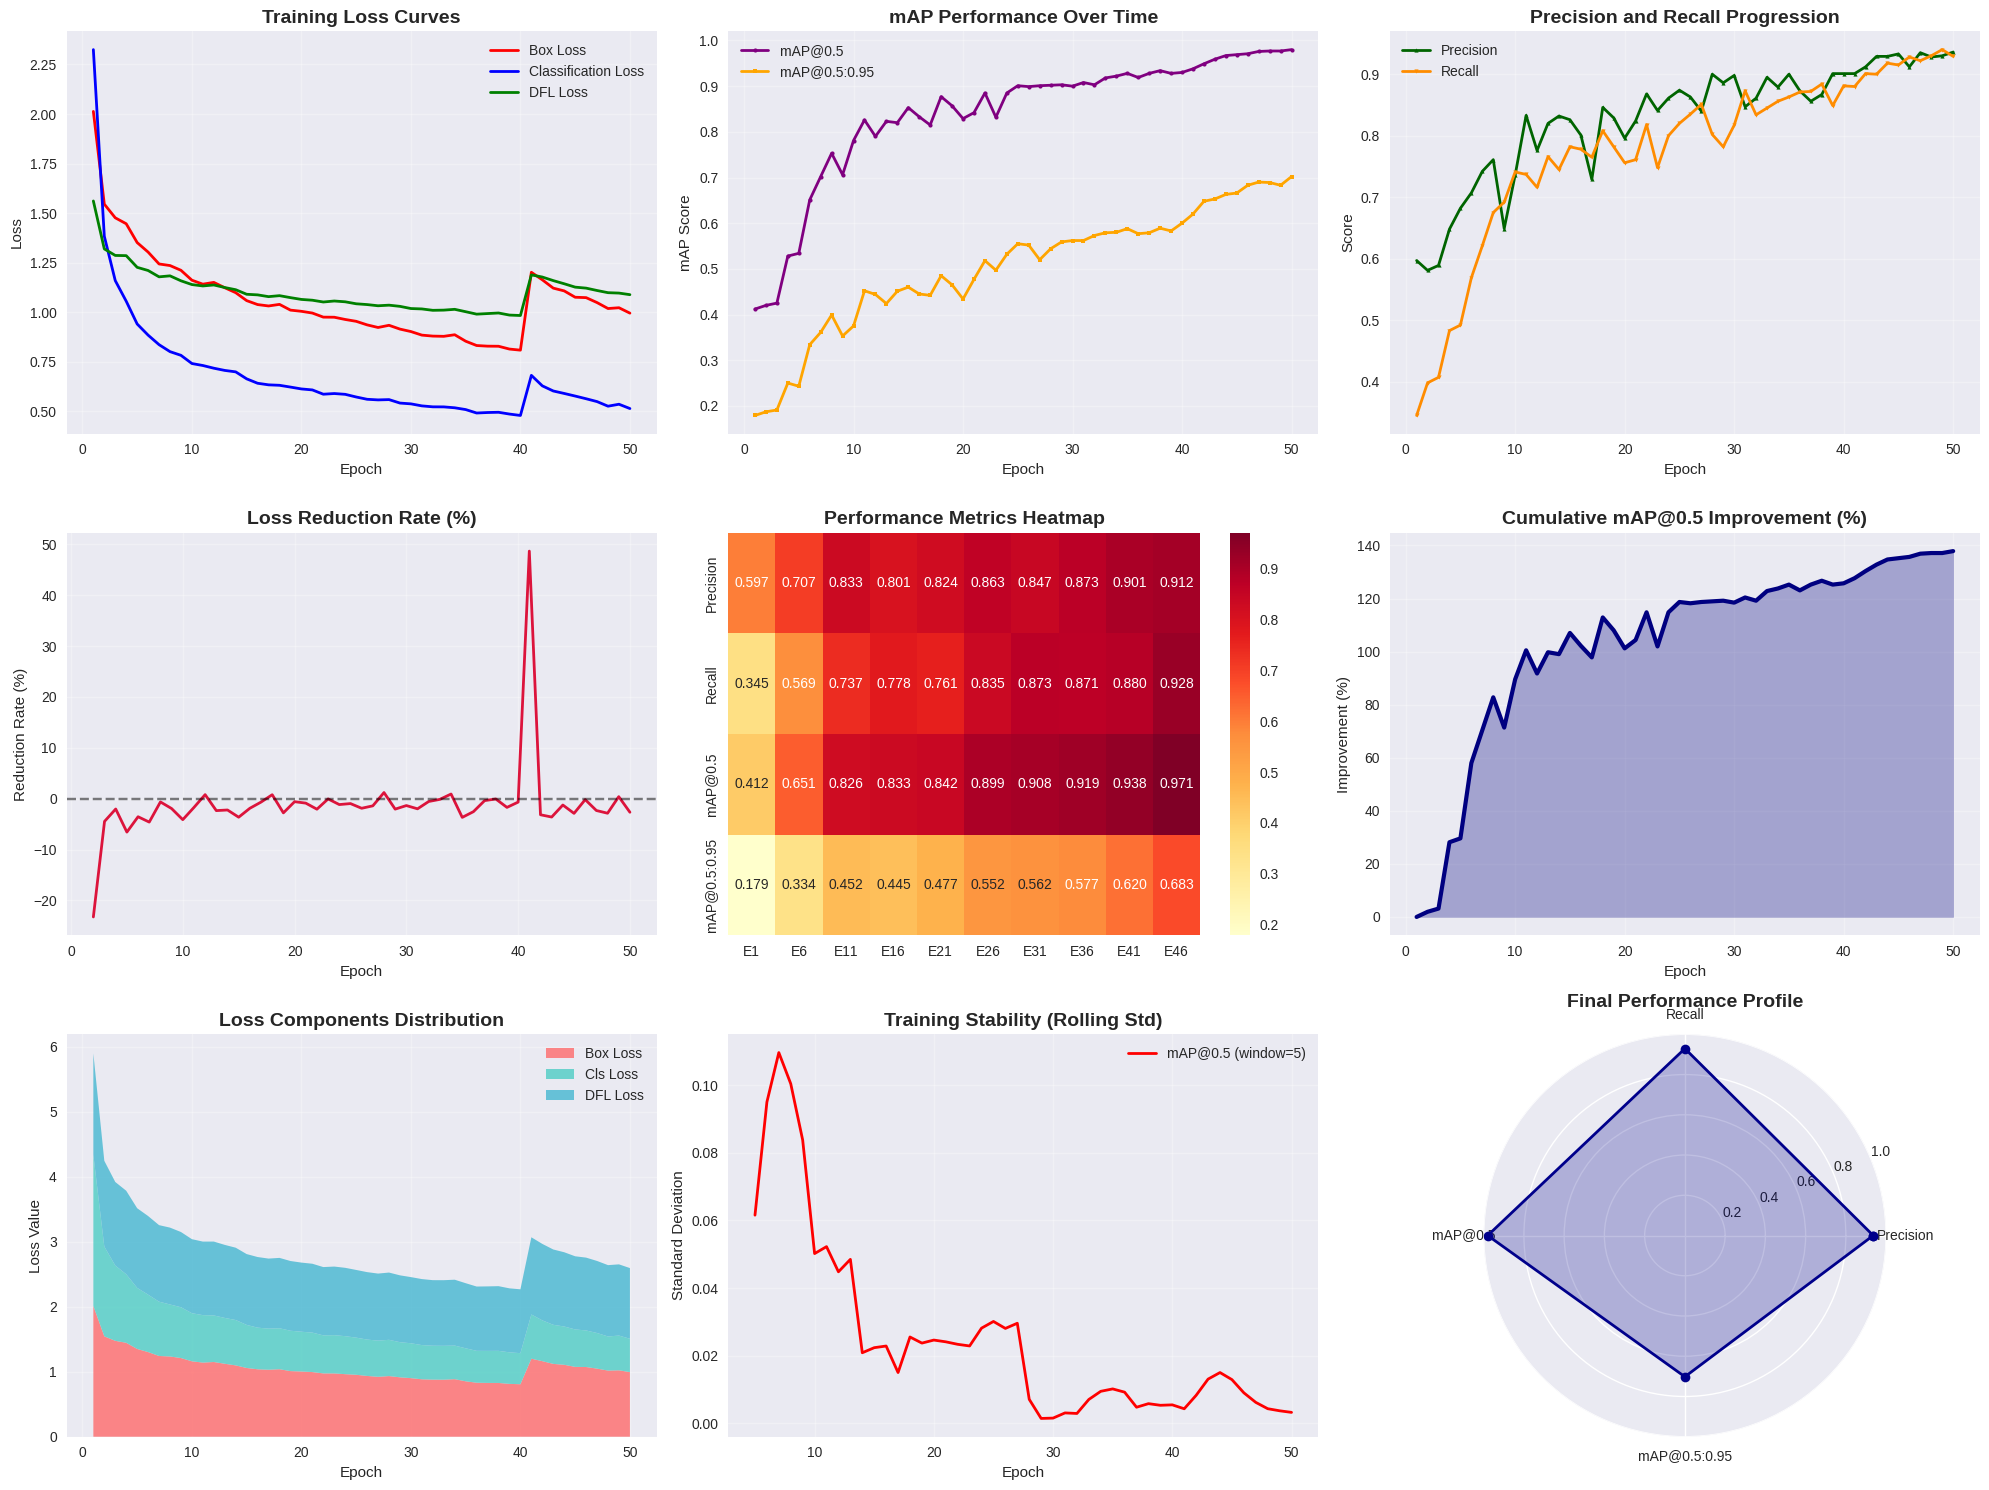


DETAILED EPOCH-BY-EPOCH ANALYSIS
 epoch  box_loss  cls_loss  precision  recall  mAP50  mAP50_95
     1     2.013     2.325      0.597   0.345  0.412     0.179
    10     1.161     0.740      0.736   0.741  0.781     0.375
    20     1.004     0.612      0.796   0.756  0.829     0.434
    30     0.902     0.537      0.898   0.817  0.900     0.562
    40     0.808     0.478      0.901   0.881  0.930     0.600
    50     0.995     0.513      0.936   0.929  0.980     0.702


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re

# Extract training data from the log
def parse_training_log():
    """Parse the training log and extract metrics for each epoch"""

    # Training data extracted from the log
    training_data = {
        'epoch': list(range(1, 51)),
        'box_loss': [2.013, 1.545, 1.476, 1.446, 1.351, 1.303, 1.243, 1.235, 1.211, 1.161,
                    1.141, 1.150, 1.123, 1.098, 1.058, 1.038, 1.031, 1.039, 1.010, 1.004,
                    0.9952, 0.9746, 0.9741, 0.9628, 0.9535, 0.9355, 0.9223, 0.9334, 0.9142, 0.9018,
                    0.8838, 0.8789, 0.8777, 0.8857, 0.8531, 0.8313, 0.8281, 0.8276, 0.8134, 0.8079,
                    1.201, 1.163, 1.121, 1.107, 1.075, 1.073, 1.048, 1.018, 1.022, 0.9947],
        'cls_loss': [2.325, 1.383, 1.159, 1.055, 0.940, 0.8837, 0.8356, 0.8004, 0.7818, 0.7404,
                    0.7304, 0.7168, 0.7056, 0.6983, 0.6631, 0.6408, 0.6328, 0.6305, 0.6215, 0.6121,
                    0.6072, 0.5855, 0.5889, 0.5849, 0.5715, 0.5599, 0.5568, 0.5583, 0.5408, 0.5368,
                    0.5266, 0.5218, 0.5215, 0.517, 0.508, 0.4906, 0.4931, 0.4943, 0.4853, 0.4782,
                    0.6807, 0.6277, 0.6018, 0.5893, 0.5762, 0.5626, 0.5482, 0.525, 0.5349, 0.5131],
        'dfl_loss': [1.561, 1.319, 1.286, 1.285, 1.226, 1.21, 1.178, 1.183, 1.158, 1.139,
                    1.132, 1.137, 1.124, 1.113, 1.09, 1.087, 1.078, 1.083, 1.073, 1.064,
                    1.06, 1.051, 1.056, 1.052, 1.042, 1.038, 1.032, 1.035, 1.029, 1.018,
                    1.016, 1.009, 1.01, 1.014, 1.002, 0.9897, 0.9926, 0.9955, 0.985, 0.9828,
                    1.188, 1.177, 1.159, 1.143, 1.126, 1.121, 1.109, 1.098, 1.096, 1.088],
        'precision': [0.597, 0.581, 0.589, 0.648, 0.682, 0.707, 0.742, 0.761, 0.649, 0.736,
                     0.833, 0.776, 0.82, 0.832, 0.826, 0.801, 0.729, 0.846, 0.829, 0.796,
                     0.824, 0.868, 0.841, 0.861, 0.874, 0.863, 0.84, 0.9, 0.886, 0.898,
                     0.847, 0.861, 0.895, 0.879, 0.9, 0.873, 0.856, 0.867, 0.901, 0.901,
                     0.901, 0.912, 0.929, 0.929, 0.933, 0.912, 0.935, 0.928, 0.93, 0.936],
        'recall': [0.345, 0.398, 0.407, 0.483, 0.492, 0.569, 0.621, 0.675, 0.692, 0.741,
                  0.737, 0.716, 0.766, 0.745, 0.782, 0.778, 0.765, 0.808, 0.782, 0.756,
                  0.761, 0.818, 0.748, 0.8, 0.82, 0.835, 0.851, 0.802, 0.782, 0.817,
                  0.873, 0.834, 0.845, 0.856, 0.863, 0.871, 0.872, 0.884, 0.849, 0.881,
                  0.88, 0.901, 0.9, 0.918, 0.915, 0.928, 0.922, 0.93, 0.94, 0.929],
        'mAP50': [0.412, 0.42, 0.425, 0.528, 0.534, 0.651, 0.702, 0.753, 0.706, 0.781,
                 0.826, 0.79, 0.823, 0.82, 0.853, 0.833, 0.815, 0.877, 0.857, 0.829,
                 0.842, 0.885, 0.832, 0.885, 0.901, 0.899, 0.901, 0.902, 0.903, 0.9,
                 0.908, 0.903, 0.918, 0.922, 0.928, 0.919, 0.928, 0.934, 0.928, 0.93,
                 0.938, 0.949, 0.959, 0.967, 0.969, 0.971, 0.976, 0.977, 0.977, 0.98],
        'mAP50_95': [0.179, 0.187, 0.191, 0.25, 0.243, 0.334, 0.361, 0.399, 0.353, 0.375,
                    0.452, 0.444, 0.424, 0.451, 0.46, 0.445, 0.442, 0.485, 0.465, 0.434,
                    0.477, 0.518, 0.497, 0.532, 0.555, 0.552, 0.52, 0.544, 0.559, 0.562,
                    0.562, 0.573, 0.579, 0.58, 0.588, 0.577, 0.579, 0.589, 0.583, 0.6,
                    0.62, 0.648, 0.653, 0.663, 0.666, 0.683, 0.69, 0.689, 0.683, 0.702]
    }

    return pd.DataFrame(training_data)

def calculate_performance_metrics(df):
    """Calculate comprehensive performance metrics"""

    metrics = {}

    # Basic Statistics
    metrics['training_summary'] = {
        'total_epochs': len(df),
        'final_mAP50': df['mAP50'].iloc[-1],
        'final_mAP50_95': df['mAP50_95'].iloc[-1],
        'final_precision': df['precision'].iloc[-1],
        'final_recall': df['recall'].iloc[-1],
        'best_mAP50': df['mAP50'].max(),
        'best_mAP50_95': df['mAP50_95'].max(),
        'best_epoch_mAP50': df.loc[df['mAP50'].idxmax(), 'epoch'],
        'best_epoch_mAP50_95': df.loc[df['mAP50_95'].idxmax(), 'epoch']
    }

    # Loss Analysis
    metrics['loss_analysis'] = {
        'initial_box_loss': df['box_loss'].iloc[0],
        'final_box_loss': df['box_loss'].iloc[-1],
        'box_loss_reduction': (df['box_loss'].iloc[0] - df['box_loss'].iloc[-1]) / df['box_loss'].iloc[0] * 100,
        'initial_cls_loss': df['cls_loss'].iloc[0],
        'final_cls_loss': df['cls_loss'].iloc[-1],
        'cls_loss_reduction': (df['cls_loss'].iloc[0] - df['cls_loss'].iloc[-1]) / df['cls_loss'].iloc[0] * 100,
        'total_loss_trend': 'Decreasing' if df['box_loss'].iloc[-1] < df['box_loss'].iloc[0] else 'Increasing'
    }

    # Performance Improvement
    metrics['performance_improvement'] = {
        'mAP50_improvement': (df['mAP50'].iloc[-1] - df['mAP50'].iloc[0]) / df['mAP50'].iloc[0] * 100,
        'mAP50_95_improvement': (df['mAP50_95'].iloc[-1] - df['mAP50_95'].iloc[0]) / df['mAP50_95'].iloc[0] * 100,
        'precision_improvement': (df['precision'].iloc[-1] - df['precision'].iloc[0]) / df['precision'].iloc[0] * 100,
        'recall_improvement': (df['recall'].iloc[-1] - df['recall'].iloc[0]) / df['recall'].iloc[0] * 100
    }

    # Convergence Analysis
    last_10_epochs = df.tail(10)
    metrics['convergence'] = {
        'mAP50_stability': last_10_epochs['mAP50'].std(),
        'loss_stability': last_10_epochs['box_loss'].std(),
        'converged': last_10_epochs['mAP50'].std() < 0.01,  # Low variance indicates convergence
        'overfitting_risk': 'Low' if last_10_epochs['mAP50'].mean() > df['mAP50'].iloc[:40].mean() else 'Moderate'
    }

    return metrics

def create_performance_visualizations(df):
    """Create comprehensive performance visualizations"""

    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))

    # 1. Training Loss Curves
    plt.subplot(3, 3, 1)
    plt.plot(df['epoch'], df['box_loss'], label='Box Loss', linewidth=2, color='red')
    plt.plot(df['epoch'], df['cls_loss'], label='Classification Loss', linewidth=2, color='blue')
    plt.plot(df['epoch'], df['dfl_loss'], label='DFL Loss', linewidth=2, color='green')
    plt.title('Training Loss Curves', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. mAP Progression
    plt.subplot(3, 3, 2)
    plt.plot(df['epoch'], df['mAP50'], label='mAP@0.5', linewidth=2, color='purple', marker='o', markersize=3)
    plt.plot(df['epoch'], df['mAP50_95'], label='mAP@0.5:0.95', linewidth=2, color='orange', marker='s', markersize=3)
    plt.title('mAP Performance Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('mAP Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Precision and Recall
    plt.subplot(3, 3, 3)
    plt.plot(df['epoch'], df['precision'], label='Precision', linewidth=2, color='darkgreen', marker='^', markersize=3)
    plt.plot(df['epoch'], df['recall'], label='Recall', linewidth=2, color='darkorange', marker='v', markersize=3)
    plt.title('Precision and Recall Progression', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. Learning Rate Impact (Box Loss Reduction Rate)
    plt.subplot(3, 3, 4)
    loss_reduction_rate = np.diff(df['box_loss']) / df['box_loss'].iloc[:-1] * 100
    plt.plot(df['epoch'].iloc[1:], loss_reduction_rate, linewidth=2, color='crimson')
    plt.title('Loss Reduction Rate (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Reduction Rate (%)')
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)

    # 5. Performance Heatmap
    plt.subplot(3, 3, 5)
    metrics_for_heatmap = df[['precision', 'recall', 'mAP50', 'mAP50_95']].T
    epochs_to_show = list(range(0, 50, 5))  # Show every 5th epoch
    sns.heatmap(metrics_for_heatmap.iloc[:, epochs_to_show],
                annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=[f'E{i+1}' for i in epochs_to_show],
                yticklabels=['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95'])
    plt.title('Performance Metrics Heatmap', fontsize=14, fontweight='bold')

    # 6. Cumulative Improvement
    plt.subplot(3, 3, 6)
    mAP50_improvement = (df['mAP50'] - df['mAP50'].iloc[0]) / df['mAP50'].iloc[0] * 100
    plt.plot(df['epoch'], mAP50_improvement, linewidth=3, color='navy')
    plt.fill_between(df['epoch'], mAP50_improvement, alpha=0.3, color='navy')
    plt.title('Cumulative mAP@0.5 Improvement (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Improvement (%)')
    plt.grid(True, alpha=0.3)

    # 7. Loss Components Stacked Area
    plt.subplot(3, 3, 7)
    plt.stackplot(df['epoch'], df['box_loss'], df['cls_loss'], df['dfl_loss'],
                  labels=['Box Loss', 'Cls Loss', 'DFL Loss'],
                  colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    plt.title('Loss Components Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

    # 8. Training Stability (Rolling Standard Deviation)
    plt.subplot(3, 3, 8)
    window = 5
    mAP50_rolling_std = df['mAP50'].rolling(window=window).std()
    plt.plot(df['epoch'], mAP50_rolling_std, linewidth=2, color='red', label=f'mAP@0.5 (window={window})')
    plt.title('Training Stability (Rolling Std)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Standard Deviation')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 9. Final Performance Radar Chart
    plt.subplot(3, 3, 9, projection='polar')
    categories = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
    values = [df['precision'].iloc[-1], df['recall'].iloc[-1],
              df['mAP50'].iloc[-1], df['mAP50_95'].iloc[-1]]

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values += values[:1]  # Complete the circle
    angles += angles[:1]

    plt.plot(angles, values, 'o-', linewidth=2, color='darkblue')
    plt.fill(angles, values, alpha=0.25, color='darkblue')
    plt.xticks(angles[:-1], categories)
    plt.ylim(0, 1)
    plt.title('Final Performance Profile', fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

def generate_performance_report(metrics):
    """Generate a comprehensive performance report"""

    print("="*80)
    print("YOLOV8 NIGHTTIME VEHICLE DETECTION - PERFORMANCE ANALYSIS REPORT")
    print("="*80)
    print()

    # Training Summary
    print("📊 TRAINING SUMMARY")
    print("-" * 40)
    summary = metrics['training_summary']
    print(f"Total Epochs Trained: {summary['total_epochs']}")
    print(f"Final mAP@0.5: {summary['final_mAP50']:.3f}")
    print(f"Final mAP@0.5:0.95: {summary['final_mAP50_95']:.3f}")
    print(f"Final Precision: {summary['final_precision']:.3f}")
    print(f"Final Recall: {summary['final_recall']:.3f}")
    print(f"Best mAP@0.5: {summary['best_mAP50']:.3f} (Epoch {summary['best_epoch_mAP50']})")
    print(f"Best mAP@0.5:0.95: {summary['best_mAP50_95']:.3f} (Epoch {summary['best_epoch_mAP50_95']})")
    print()

    # Loss Analysis
    print("📉 LOSS ANALYSIS")
    print("-" * 40)
    loss = metrics['loss_analysis']
    print(f"Box Loss Reduction: {loss['box_loss_reduction']:.1f}% ({loss['initial_box_loss']:.3f} → {loss['final_box_loss']:.3f})")
    print(f"Classification Loss Reduction: {loss['cls_loss_reduction']:.1f}% ({loss['initial_cls_loss']:.3f} → {loss['final_cls_loss']:.3f})")
    print(f"Overall Trend: {loss['total_loss_trend']}")
    print()

    # Performance Improvement
    print("📈 PERFORMANCE IMPROVEMENT")
    print("-" * 40)
    improvement = metrics['performance_improvement']
    print(f"mAP@0.5 Improvement: {improvement['mAP50_improvement']:.1f}%")
    print(f"mAP@0.5:0.95 Improvement: {improvement['mAP50_95_improvement']:.1f}%")
    print(f"Precision Improvement: {improvement['precision_improvement']:.1f}%")
    print(f"Recall Improvement: {improvement['recall_improvement']:.1f}%")
    print()

    # Convergence Analysis
    print("🎯 CONVERGENCE ANALYSIS")
    print("-" * 40)
    convergence = metrics['convergence']
    print(f"Training Converged: {'Yes' if convergence['converged'] else 'No'}")
    print(f"mAP@0.5 Stability (last 10 epochs): {convergence['mAP50_stability']:.4f}")
    print(f"Loss Stability (last 10 epochs): {convergence['loss_stability']:.4f}")
    print(f"Overfitting Risk: {convergence['overfitting_risk']}")
    print()

    # Model Performance Grade
    print("🏆 MODEL PERFORMANCE GRADE")
    print("-" * 40)
    final_mAP50 = summary['final_mAP50']
    if final_mAP50 >= 0.9:
        grade = "A+ (Excellent)"
    elif final_mAP50 >= 0.8:
        grade = "A (Very Good)"
    elif final_mAP50 >= 0.7:
        grade = "B+ (Good)"
    elif final_mAP50 >= 0.6:
        grade = "B (Fair)"
    else:
        grade = "C (Needs Improvement)"

    print(f"Overall Grade: {grade}")
    print()

    # Recommendations
    print("💡 RECOMMENDATIONS")
    print("-" * 40)
    if convergence['converged']:
        print("✅ Model has converged successfully")
    else:
        print("⚠️  Consider training for more epochs for better convergence")

    if final_mAP50 > 0.95:
        print("✅ Excellent performance achieved")
    elif improvement['mAP50_improvement'] > 100:
        print("✅ Significant improvement observed during training")

    if convergence['overfitting_risk'] == 'Moderate':
        print("⚠️  Monitor for overfitting - consider early stopping or regularization")

    print("="*80)

# Main execution
def main():
    """Main function to run the complete performance analysis"""

    # Parse training data
    df = parse_training_log()

    # Calculate metrics
    metrics = calculate_performance_metrics(df)


    # Generate report
    generate_performance_report(metrics)

    # Create visualizations
    create_performance_visualizations(df)

    # Additional analysis table
    print("\nDETAILED EPOCH-BY-EPOCH ANALYSIS")
    print("="*80)

    # Key milestones
    milestones = [1, 10, 20, 30, 40, 50]
    milestone_df = df[df['epoch'].isin(milestones)][['epoch', 'box_loss', 'cls_loss', 'precision', 'recall', 'mAP50', 'mAP50_95']]
    print(milestone_df.to_string(index=False, float_format='%.3f'))

    return df, metrics

# Execute the analysis
if __name__ == "__main__":
    training_df, performance_metrics = main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Quick backup to Google Drive
import shutil
shutil.copy2(
    "/content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/best.pt",
    "/content/drive/MyDrive/my_nighttime_vehicle_detector.pt"
)

# Quick download to local machine
from google.colab import files
files.download("/content/drive/MyDrive/nighttime_vehicle_results/yolov8n_nighttime_optimized/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>